In [51]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt

# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Downloads\LGD_DATA.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']
print(df.head(5)) 
print(df.ndim)
print(df.shape)

    Ac_No  Age  Years of Experience  Number of Vehicles Gender  Married  \
0  150024   24                    5                   1      M  Married   
1  144880   31                   10                   1      F   Single   
2  133742   56                   37                   1      M  Married   
3  151282   52                   31                   1      F  Married   
4  174407   20                    3                   1      M   Single   

   Losses in Thousands  
0           203.319595  
1           402.197302  
2           553.132096  
3           292.430579  
4           246.540576  
2
(15290, 7)


In [52]:
# pd.get_dummies allows to convert a categorical variable into dummy variables
# Create a set of dummy variables from the sex variable
df_Gender = pd.get_dummies(df['Gender'])
df_Married = pd.get_dummies(df['Married'])
# Join the dummy variables to the main dataframe
df_new = pd.concat([df, df_Gender], axis=1)
df_new = pd.concat([df_new, df_Married], axis=1)         
df_new.head()    

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,F,M,Married,Single
0,150024,24,5,1,M,Married,203.319595,0,1,1,0
1,144880,31,10,1,F,Single,402.197302,1,0,0,1
2,133742,56,37,1,M,Married,553.132096,0,1,1,0
3,151282,52,31,1,F,Married,292.430579,1,0,1,0
4,174407,20,3,1,M,Single,246.540576,0,1,0,1


In [53]:
dfClean = df_new[['Age','Number of Vehicles','F','Single','Losses in Thousands']].copy()
print(dfClean.head(5)) 


   Age  Number of Vehicles  F  Single  Losses in Thousands
0   24                   1  0       0           203.319595
1   31                   1  1       1           402.197302
2   56                   1  0       0           553.132096
3   52                   1  1       0           292.430579
4   20                   1  0       1           246.540576


In [54]:
dfClean = dfClean.rename(columns={'Number of Vehicles': 'nVeh', 'Losses in Thousands': 'LTh'})
print(dfClean.head(5)) 

import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
results = smf.ols('LTh ~ Age + nVeh + F + Single', data=dfClean).fit()
print(results.summary())

   Age  nVeh  F  Single         LTh
0   24     1  0       0  203.319595
1   31     1  1       1  402.197302
2   56     1  0       0  553.132096
3   52     1  1       0  292.430579
4   20     1  0       1  246.540576
                            OLS Regression Results                            
Dep. Variable:                    LTh   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     1652.
Date:                Fri, 10 Aug 2018   Prob (F-statistic):               0.00
Time:                        10:10:56   Log-Likelihood:            -1.0360e+05
No. Observations:               15290   AIC:                         2.072e+05
Df Residuals:                   15285   BIC:                         2.072e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                    

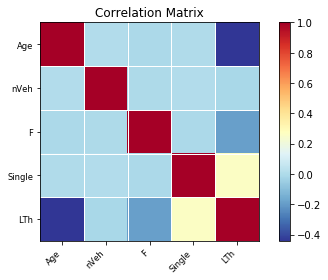

In [55]:
import statsmodels.graphics.api as smg
corr_matrix = np.corrcoef(dfClean.T)
smg.plot_corr(corr_matrix, xnames=dfClean.columns)
plt.show()

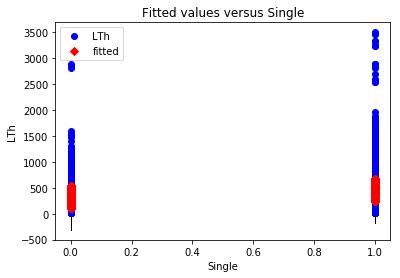

In [56]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 4, ax=ax) # change 1 to 4
plt.show()

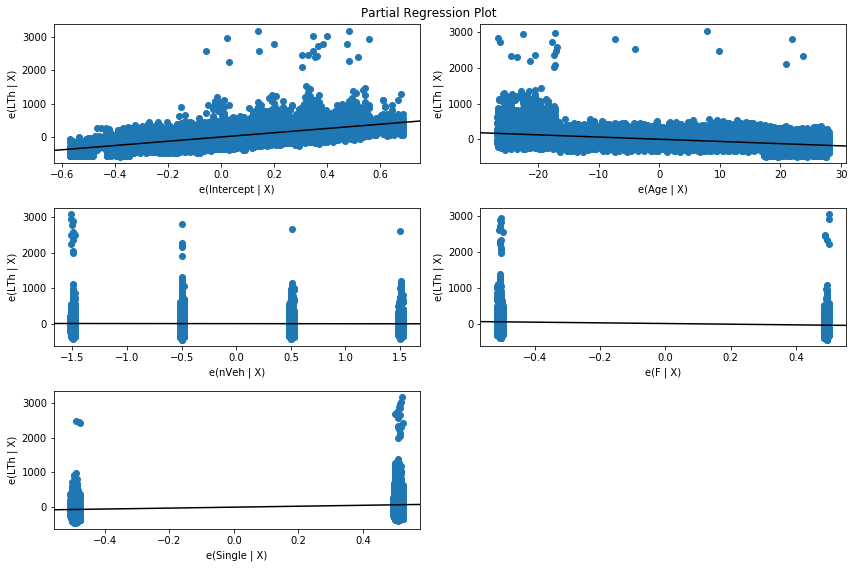

In [57]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)

In [58]:
from statsmodels.formula.api import rlm
rob_crime_model = rlm("LTh ~ Age + nVeh + F + Single", data=dfClean, 
                      M=sm.robust.norms.TukeyBiweight(3)).fit(conv="weights")
print(rob_crime_model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                    LTh   No. Observations:                15290
Model:                            RLM   Df Residuals:                    15285
Method:                          IRLS   Df Model:                            4
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 10 Aug 2018                                         
Time:                        10:10:58                                         
No. Iterations:                    26                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    544.1037      5.692     95.592      0.0

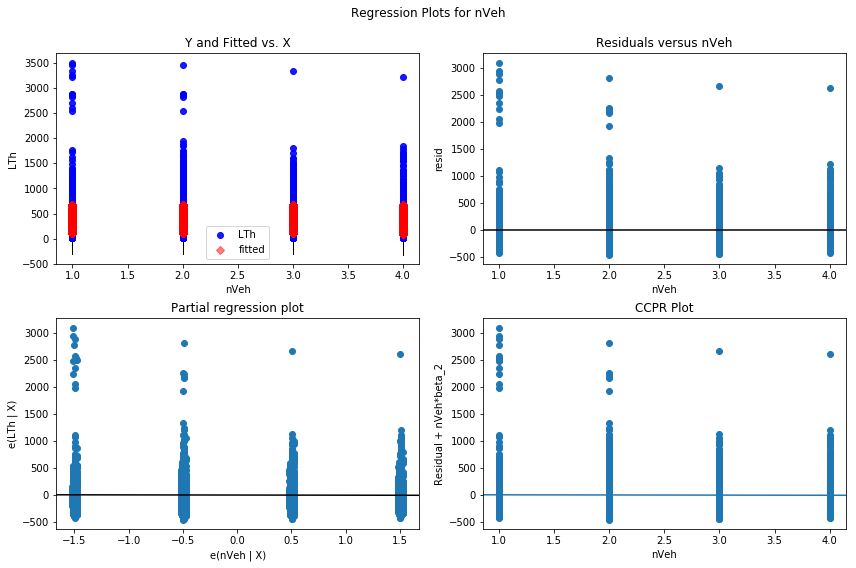

In [59]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "nVeh", fig=fig)

In [60]:
# probability
# p = e (- Factor* Factorx1) / 1+ e(-x)
# e = Natural Log


# probability
#p = exp(y1) / 1+ exp(y1)  
## Y = 639 + (-6*age) +(-2.7*nVeh)+(-93*F)+ (134*single)

# Y = 639 + (-6*30) +(-2.7*2)+(-93*0)+ (134*0)
# Age 30, Number of vehicles = 2, 0 = Female / 1= Male,Married = 1 / Single = 0

Y = 639 + (-6*30) +(-2.7*2)+(-93*0)+ (134*0)
print(Y)


453.6


In [100]:
# Age 30, Number of vehicles = 2, 0 = Female / 1= Male,Married = 1 / Single = 0
import math
import numpy as np
Y = 639 + (-6*30) +(-2.7*2)+(-93*0)+ (134*0)
print(Y) 
YNaturalLog = np.log(Y)
print(YNaturalLog)

# exp(x) = e^x where e= 2.718281(approx)

Y2 = np.log(Y)
print(Y2)

# 
prob = (YNaturalLog / (1 + YNaturalLog))
print(prob)
print(prob*100)



453.6
6.11721575241
6.11721575241
0.85949561812
85.949561812


In [106]:
# Age 30, Number of vehicles = 2, 0 = Female / 1= Male,Married = 1 / Single = 0
import math
import numpy as np
Y = 639 + (-6*20) +(-2.7*1)
print(Y) 
YNaturalLog = np.log(Y)
print(YNaturalLog)

# exp(x) = e^x where e= 2.718281(approx)

Y2 = 1+np.log(Y)
print(Y2)

# 
prob = (YNaturalLog / (1+YNaturalLog))
print(prob)
print(prob*100)


516.3
6.24668799189
7.24668799189
0.862005925863
86.2005925863


In [103]:
# Age 30, Number of vehicles = 2, 0 = Female / 1= Male,Married = 1 / Single = 0
import math
import numpy as np
Y = 100 + (-6*10) +(-2.7*1)
print(Y) 
YNaturalLog = np.log(Y)
print(YNaturalLog)

# exp(x) = e^x where e= 2.718281(approx)

Y2 = 1+np.log(Y)
print(Y2)

# 
prob = (YNaturalLog / (1+YNaturalLog))
print(prob)
print(prob*100)


37.3
3.61899332665
4.61899332665
0.783502609924
78.3502609924


In [68]:
# with score board
# F - 80, M= 100
#M = 80, single=100

dfClean = df_new[['Age','Number of Vehicles','F','Single','Losses in Thousands']].copy()
print(dfClean.head(5)) 

dfClean['RatingF'] = np.where(dfClean['F']>=1, 100, 80)
dfClean['RatingS'] = np.where(dfClean['Single']>=1, 100, 80)
print(dfClean.head())

dfClean2 = dfClean[['Age','Number of Vehicles','RatingF','RatingS','Losses in Thousands']].copy()
print(dfClean2.head(5))

   Age  Number of Vehicles  F  Single  Losses in Thousands
0   24                   1  0       0           203.319595
1   31                   1  1       1           402.197302
2   56                   1  0       0           553.132096
3   52                   1  1       0           292.430579
4   20                   1  0       1           246.540576
   Age  Number of Vehicles  F  Single  Losses in Thousands  RatingF  RatingS
0   24                   1  0       0           203.319595       80       80
1   31                   1  1       1           402.197302      100      100
2   56                   1  0       0           553.132096       80       80
3   52                   1  1       0           292.430579      100       80
4   20                   1  0       1           246.540576       80      100
   Age  Number of Vehicles  RatingF  RatingS  Losses in Thousands
0   24                   1       80       80           203.319595
1   31                   1      100      100        

In [70]:
dfClean = dfClean.rename(columns={'Number of Vehicles': 'nVeh', 'Losses in Thousands': 'LTh'})
print(dfClean.head(5)) 
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
results = smf.ols('LTh ~ Age + nVeh + RatingF + RatingS', data=dfClean).fit()
print(results.summary())

   Age  nVeh  F  Single         LTh  RatingF  RatingS
0   24     1  0       0  203.319595       80       80
1   31     1  1       1  402.197302      100      100
2   56     1  0       0  553.132096       80       80
3   52     1  1       0  292.430579      100       80
4   20     1  0       1  246.540576       80      100
                            OLS Regression Results                            
Dep. Variable:                    LTh   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     1652.
Date:                Fri, 10 Aug 2018   Prob (F-statistic):               0.00
Time:                        10:19:58   Log-Likelihood:            -1.0360e+05
No. Observations:               15290   AIC:                         2.072e+05
Df Residuals:                   15285   BIC:                         2.072e+05
Df Model:                           4       

In [112]:
import math as math
import numpy as np
Y = 474 + (-6*20) +(-2.7*4)+(-4.7*80)+ (6.74*100)
#Z  = abs((-6*20) +(-2.7*80)+(-4.7*80)+ (6.74*100))
print(Y) 
#print(Z)
YNaturalLog = np.log(Y)
print(YNaturalLog)

# exp(x) = e^x where e= 2.718281(approx)


prob = (np.log(Y) / (1 + np.log(Y)))
print(prob)
print(prob*100)

161.20000000000005
5.08264583007
0.835597858574
83.5597858574
